<center><img src="https://www.cardrates.com/wp-content/uploads/2020/08/shutterstock_576998230.jpg"></center><br>

# Using Machine Learning to Detect Credit Card Frauds

# Introduction<br>
Everyday **billions** of credit card transactions are made all around the world. Considering the widespread use of smartphones and the Internet throughout the earth, more and more people are using their credit cards to make purchases online, making payments through apps,etc...<br><br>
In a scenario such as this one, it is **extremely** important that credit card companies are able to easily recognize when a transaction is a result of a fraud or a genuine purchase, avoiding that customers end up being charged for items they did not acquire.<br><br>
In this project, I'll use the **scikit-learn** library to develop a prediction model that is able to learn and detect when a transaction is a fraud or a genuine purchase. I intend to use two classification algorithms, **Decision Tree** and **Random Forest**, to identify which one of them achieve the best results with our dataset.

# Importing Libraries

In [2]:
# Libraries for exploring, handling and visualizing data
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, plotly.express as px
# Sklearn's preprocessing library
from sklearn.preprocessing import StandardScaler
# Importing train and test data split
from sklearn.model_selection import train_test_split
# Sklearn's metrics to evaluate our models
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Setting theme style and color palette to seaborn 
sns.set_theme(context = 'notebook', style='darkgrid',palette='dark')
# Importing plotly.io for GitHub
import plotly.io as pio
pio.renderers.default = 'svg'

# Obtaining Data

In [5]:
# Obtaining data
df = pd.read_csv('creditcard.csv')
# Display dataframe
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Getting to Know the Dataset<br>

The dataset <a href= "https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud">Credit Card Fraud Detection</a> contains credit card transactions that happened in September, 2013 by european clients for two days.<br><br>
The dataset has the feature **time**, which shows us the seconds elapsed between each transaction and the first transaction in the dataset. The feature **amount**, containing the transaction amount
and the feature **class**, which tells us if that certain transaction is genuine or a fraud, where 1 = fraud and 0 = genuine.<br><br>
Features V1, V2,... V28 are numerical input variables resulted of a <a href = "https://en.wikipedia.org/wiki/Principal_component_analysis">PCA transformation </a> whose content couldn't be displayed due to their **confidential** nature.

In [3]:
# Verifying data types
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

This dataset contains **only numerical** data. Most columns display *float* variables, while **class** is the only column whose data are *int* variables. 

In [4]:
# Verifying if there are any NaN-Not a Number value
df.isna().values.any()

False

In [5]:
# Statistic information regarding amounts
df.Amount.describe().round(2)

count    284807.00
mean         88.35
std         250.12
min           0.00
25%           5.60
50%          22.00
75%          77.16
max       25691.16
Name: Amount, dtype: float64

**75%** of transactions in the analyzed period were up to €77.16.<br><br>
The **maximum amount** identified during this period was €25,691.16, way higher than the average amount of €88.35.

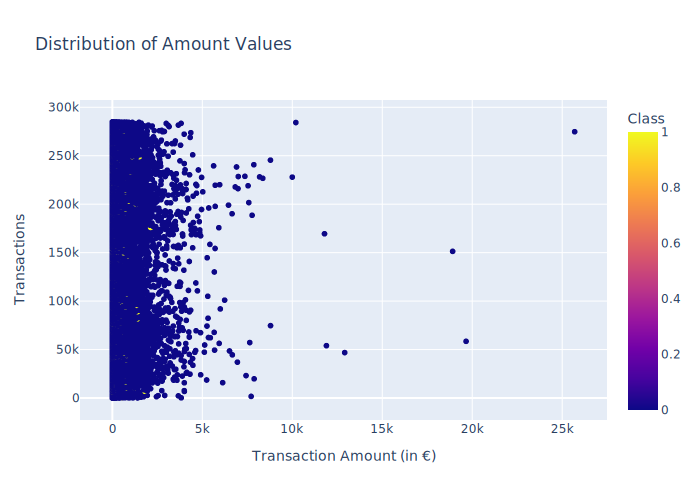

In [6]:
# Visualizing distribution of amounts
fig = px.scatter(df, x = 'Amount', y =df.index, color = df.Class,
                title = 'Distribution of Amount Values')
fig.update_layout(xaxis_title='Transaction Amount (in €)',
                    yaxis_title='Transactions')
fig.show()

In [7]:
# Sorting fraudulent transactions by amount
df.query("Class == 1").sort_values('Amount', ascending = False)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
176049,122608.0,-2.003460,-7.159042,-4.050976,1.309580,-2.058102,-0.098621,2.880083,-0.727484,1.460381,...,1.244287,-1.015232,-1.800985,0.657586,-0.435617,-0.894509,-0.397557,0.314262,2125.87,1
6971,9064.0,-3.499108,0.258555,-4.489558,4.853894,-6.974522,3.628382,5.431271,-1.946734,-0.775680,...,-1.052368,0.204817,-2.119007,0.170279,-0.393844,0.296367,1.985913,-0.900452,1809.68,1
249167,154278.0,-1.600211,-3.488130,-6.459303,3.246816,-1.614608,-1.260375,0.288223,-0.048964,-0.734975,...,1.191175,-0.967141,-1.463421,-0.624231,-0.176462,0.400348,0.152947,0.477775,1504.93,1
89190,62467.0,-5.344665,-0.285760,-3.835616,5.337048,-7.609909,3.874668,1.289630,0.201742,-3.003532,...,0.276011,1.342045,-1.016579,-0.071361,-0.335869,0.441044,1.520613,-1.115937,1402.16,1
81609,59011.0,-2.326922,-3.348439,-3.513408,3.175060,-2.815137,-0.203363,-0.892144,0.333226,-0.802005,...,1.226648,-0.695902,-1.478490,-0.061553,0.236155,0.531911,0.302324,0.536375,1389.56,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143334,85285.0,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,...,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,0.00,1
69980,53658.0,-1.739341,1.344521,-0.534379,3.195291,-0.416196,-1.261961,-2.340991,0.713004,-1.416265,...,0.383180,-0.213952,-0.336640,0.237076,0.246003,-0.044228,0.510729,0.220952,0.00,1
248296,153875.0,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,...,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,0.00,1
93788,64585.0,1.080433,0.962831,-0.278065,2.743318,0.412364,-0.320778,0.041290,0.176170,-0.966952,...,-0.008996,-0.057036,-0.053692,-0.026373,0.400300,0.072828,0.027043,0.063238,0.00,1


Among **fraudulent** transactions, the **highest amount** is €2,125.87.

<AxesSubplot:ylabel='Class'>

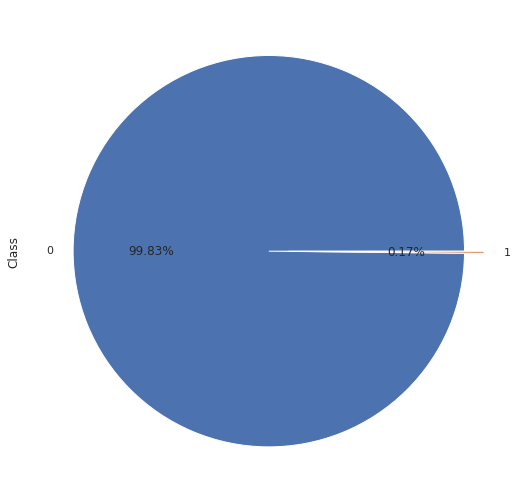

In [8]:
# Visualizing distribution of genuine and fraudulent transactions
sns.set(rc={'figure.figsize':(12,9)})
df.Class.value_counts().plot(kind='pie',autopct='%.2f%%',explode=(0,0.1))

99.83% of transactions were genuine, while only 0.17% were fraudulent.

# Using StandardScaler

Considering the fact that **amount** values are way discrepant when compared to the other features in our dataset, we will use SKLearn's *StandardScaler* method to transform these values so they don't exert a heavier impact on our models to a point where the other features would end up being unuseful to the classification algorithms

In [9]:
scaler = StandardScaler()
df['Normalized_Amount'] = scaler.fit_transform(df.Amount.values.reshape(-1,1)) # Normalizing values
# Dropping 'Amount' and 'Time' columns
df.drop(['Amount','Time'], inplace = True, axis = 1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313249


# Split 70 - 30

Now we split our data, selecting 70% of it for training and 30% for testing.

In [10]:
Y = df.Class
X = df.drop(['Class'],axis = 1)
(train_x,test_x,train_y,test_y) = train_test_split(X,Y, test_size=0.3, random_state=42)

print("train_x size: ", train_x.shape)
print("test_x size: ", test_x.shape)

train_x size:  (199364, 29)
test_x size:  (85443, 29)


# Applying Classifiers

In [11]:
# Preparing Classifiers
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier(n_estimators=100)

# Decision Tree
decision_tree.fit(train_x,train_y)
predictions_dt = decision_tree.predict(test_x)
decision_tree_score = round(decision_tree.score(test_x,test_y) * 100, 2)

# Random Forest
random_forest.fit(train_x,train_y)
prediction_rf = random_forest.predict(test_x)
random_forest_score = round(random_forest.score(test_x,test_y) * 100,2)

print('Decision Tree Performance: ', decision_tree_score)
print('Random Forest Performance: ', random_forest_score)

Decision Tree Performance:  99.93
Random Forest Performance:  99.96


# Evaluation Metrics for Classification Models<br>

When dealing with classification models, there are some evaluation metrics that we can use in order to see the efficiency of our models.<br><br>
One of those evaluation metrics is the **confusion matrix** which is a summary of predicted results compared to the actual values of our dataset. This is what a **confusion matrix** looks like for a binary classification problem:<br>
<center><img src= "https://miro.medium.com/max/1400/1*hbFaAWGBfFzlPys1TeSJuQ.png"></center><br><br>

**TP** is for **True Positive** and it shows the correct predictions of a model for a positive class.<br> 
**FP** is for **False Positive** and it shows the incorrect predictions of a model for a positive class.<br> 
**FN** is for **False Negative** and it shows the incorrect predictions of a model for a negative class.<br> 
**TN** is for **True Negative** and it shows the correct predictions of a model for a negative class.<br><br> 
Beyond the confusion matrix, we also have some other relevant metrics. They are:<br><br>  

### Accuracy <br><br> 
Accuracy simply tell us the propotion of correct predictions. This is how we calculate it:<br>
<center><img src = "https://www.mydatamodels.com/wp-content/uploads/2020/10/2.-Accuracy-formula-machine-learning-algorithms.png"></center><br><br> 

### Precision <br><br> 
Precision tells us how frequently our model correctly predicts positives. This is how we calculate it:<br>
<center><img src = "https://www.mydatamodels.com/wp-content/uploads/2020/10/5.-Precision-formula.png"></center><br><br>

### Recall <br><br> 
Recall, which can also be referred to as *sensitivity*, can tell us how well our model predicts true positives. This is how we calculate it:<br>
<center><img src = "https://www.mydatamodels.com/wp-content/uploads/2020/10/3.-Sensitivity-formula.png"></center><br><br>

### F1 Score <br><br> 
Lastly, F1 Score is the harmonic mean of precision and recall.This is how we calculate it:<br>
<center><img src = "https://www.mydatamodels.com/wp-content/uploads/2020/10/6.-Precision-recall-1024x277.png"></center><br><br>

### Performance - Decision Tree

In [12]:
# Printing performance metrics for Decision Tree classifier
metrics_decision_tree = [['Accuracy',(accuracy_score(test_y, predictions_dt))],
                         ['Precision',precision_score(test_y, predictions_dt)],
                         ['Recall', recall_score(test_y, predictions_dt)],
                         ['F1_score',f1_score(test_y, predictions_dt)]]
metric_values_decision_tree = pd.DataFrame(metrics_decision_tree, columns = ['Metrics', 'Result'])
metric_values_decision_tree

,Metrics,Result
0,Accuracy,0.999263
1,Precision,0.748299
2,Recall,0.808824
3,F1_score,0.777385


[Text(0, 0.5, 'Genuine'), Text(0, 1.5, 'Fraud')]

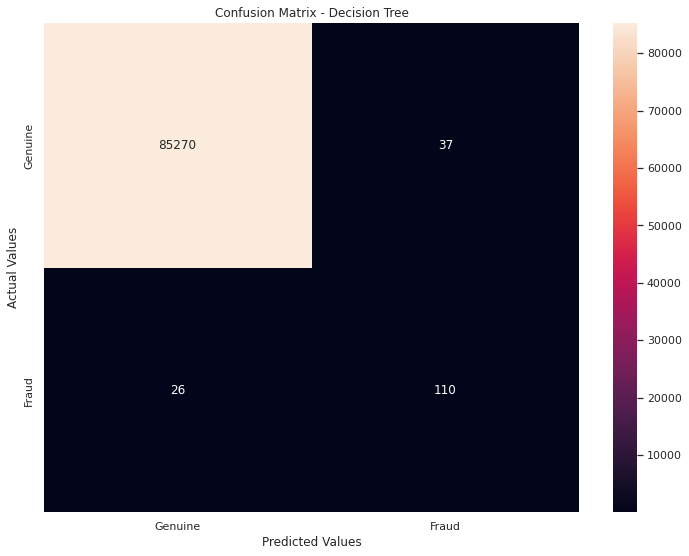

In [13]:
# Confusion Matrix
confusion_matrix_decision_tree = confusion_matrix(test_y, predictions_dt)
# Visualization
ax = plt.subplot()
sns.heatmap(confusion_matrix_decision_tree, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])

### Performance - Random Forest

In [14]:
# Performance metrics for Random Forest
metrics_random_forest = [['Accuracy',(accuracy_score(test_y, prediction_rf))],
                         ['Precision',precision_score(test_y, prediction_rf)],
                         ['Recall', recall_score(test_y, prediction_rf)],
                         ['F1_score',f1_score(test_y, prediction_rf)]]
metric_values_random_forest = pd.DataFrame(metrics_random_forest, columns = ['Metrics', 'Results'])
metric_values_random_forest

,Metrics,Results
0,Accuracy,0.999579
1,Precision,0.931034
2,Recall,0.794118
3,F1_score,0.857143


[Text(0, 0.5, 'Genuine'), Text(0, 1.5, 'Fraud')]

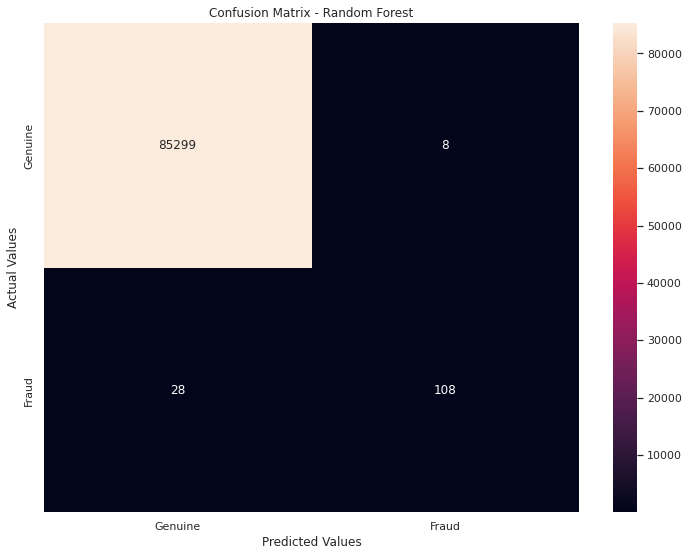

In [15]:
# Confusion Matrix
confusion_matrix_random_forest = confusion_matrix(test_y, prediction_rf)
# Visualization
ax = plt.subplot()
sns.heatmap(confusion_matrix_random_forest, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])

Looking at the **evaluation metrics**, it's possible to realize that the **Random Forest** algorithm scored higher than the **Decision Tree** algorithm. However, our model is favoring genuine transactions over fraudulent ones and that happens because we have a highly unbalanced dataset when it comes to the distribution of fraudulent and genuine transactions. Remember, only 0.17% of transactions are fraudulent in this dataset.<br><br>
In order to correct this data imbalance, we'll use **SMOTE** which is a method in **imblearn** library to do an **oversampling** of our fraudulent transaction data, which means we will synthetically create new examples of fraudulent transactions using as base the current ones we have in our dataset in order to balance the difference between genuine and fraudulent transactions.

# Oversampling with SMOTE

In [16]:
# Importing SMOTE from imblearn lib
from imblearn.over_sampling import SMOTE
resampled_x, resampled_y = SMOTE().fit_resample(X,Y) # reshaping data

print('X New Shape: ', resampled_x.shape)
print('Y New Shape: ', resampled_y.shape)

X New Shape:  (568630, 29)
Y New Shape:  (568630,)


In [17]:
# Splitting our resampled data
(train_x,test_x,train_y,test_y) = train_test_split(resampled_x, resampled_y,
                                                  test_size = 0.3, random_state = 42)

# Applying Random Forest Classifier with new resampled data
resampled_random_forest = RandomForestClassifier(n_estimators = 100)
resampled_random_forest.fit(train_x,train_y)

predictions_resampled = resampled_random_forest.predict(test_x)
random_forest_new_score = round(resampled_random_forest.score(test_x,test_y) * 100, 4)
print('Performance: ', random_forest_new_score)

Performance:  99.99


In [18]:
# Random Forest Evaluation metrics after oversampling
metrics_random_forest_resampled = [['Accuracy',(accuracy_score(test_y, predictions_resampled))],
                         ['Precision',precision_score(test_y, predictions_resampled)],
                         ['Recall', recall_score(test_y, predictions_resampled)],
                         ['F1_score',f1_score(test_y, predictions_resampled)]]
metric_values_random_forest_resampled = pd.DataFrame(metrics_random_forest_resampled, columns = ['Metrics', 'Results'])
metric_values_random_forest_resampled

,Metrics,Results
0,Accuracy,0.999900
1,Precision,0.999801
2,Recall,1.000000
3,F1_score,0.999901


[Text(0, 0.5, 'Genuine'), Text(0, 1.5, 'Fraud')]

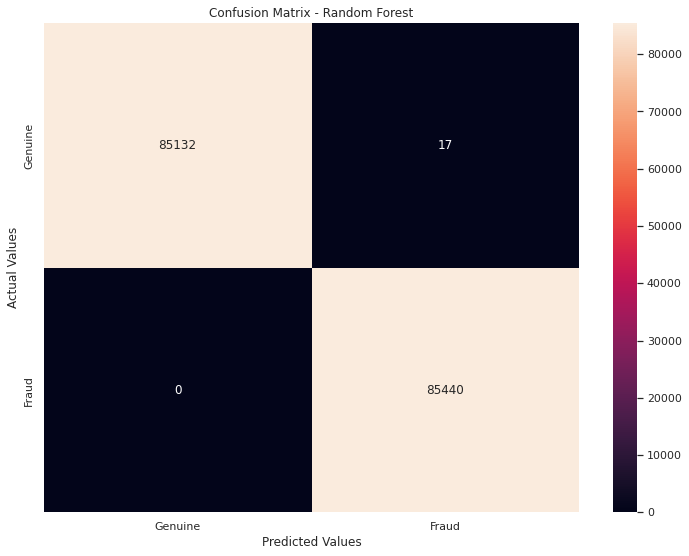

In [19]:
# Confusion Matrix
confusion_matrix_random_forest_resampled = confusion_matrix(test_y, predictions_resampled)
# Visualization
ax = plt.subplot()
sns.heatmap(confusion_matrix_random_forest_resampled, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])

# Conclusion <br>
After using SMOTE to oversample our data, we can see that the model isn't favouring genuine transactions over fraudulent ones anymore and as result, we now have:<br><br>
- 85.132 True Positives.<br>
- 17 False Negatives.<br>
- 0 False Positives.<br>
- 85.440 True Negatives.<br><br>

We've also achieved:<br><br>
- Accuracy: 99.99%;
- Precision: 99.98%;
- Recall: 100%;
- F1 Score: 99.99%.

All great metrics, which indicates that our model has learned and it's now capable of identifying credit card frauds efficiently.